In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
df= pd.read_csv('hyd10yr.csv')
print(df)

          STATION                      NAME        DATE  TAVG  TMAX  TMIN
0     IN001080500  BEGUMPET OBSERVATORY, IN  2009-01-01  23.0  29.9   NaN
1     IN001080500  BEGUMPET OBSERVATORY, IN  2009-01-02  22.4   NaN   NaN
2     IN001080500  BEGUMPET OBSERVATORY, IN  2009-01-03  23.4  28.6  15.7
3     IN001080500  BEGUMPET OBSERVATORY, IN  2009-01-04  22.5  29.4   NaN
4     IN001080500  BEGUMPET OBSERVATORY, IN  2009-01-05  23.0  30.0   NaN
...           ...                       ...         ...   ...   ...   ...
4353  IN001080500  BEGUMPET OBSERVATORY, IN  2020-12-23  20.7  29.4   NaN
4354  IN001080500  BEGUMPET OBSERVATORY, IN  2020-12-24  21.7  28.6  14.2
4355  IN001080500  BEGUMPET OBSERVATORY, IN  2020-12-25  20.3  28.2   NaN
4356  IN001080500  BEGUMPET OBSERVATORY, IN  2020-12-26  20.4   NaN   NaN
4357  IN001080500  BEGUMPET OBSERVATORY, IN  2020-12-27  21.2   NaN   NaN

[4358 rows x 6 columns]


In [233]:
df.TMAX.fillna(df.TAVG,inplace = True)

In [234]:
df.TMIN.fillna(df.TAVG,inplace = True)


In [235]:
# Stations
df['STATION'].unique()

array(['IN001080500'], dtype=object)

In [236]:
# Number of unique stations
len(df['STATION'].unique())

1

In [237]:
df = df.sort_values(by='DATE')
df.head()


,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-01,23.0,29.9,23.0
1,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-02,22.4,22.4,22.4
2,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-03,23.4,28.6,15.7
3,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-04,22.5,29.4,22.5
4,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-05,23.0,30.0,23.0


In [238]:
decade = df[(df['DATE'] >= '2009-01-01') & (df['DATE'] < '2020-01-01')]
decade.head()
print(decade['DATE'].max())
print(decade['DATE'].min())

2019-12-31
2009-01-01


In [239]:
year_2020 = df[(df['DATE'] >= '2020-01-01')]
year_2020['DATE'].min()

'2020-01-01'

In [240]:
# Change date to datetime formats
decade['DATE'] = pd.to_datetime(decade['DATE'])
year_2020['DATE']=pd.to_datetime(year_2020['DATE'])

<ipython-input-240-226c37b38f8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade['DATE'] = pd.to_datetime(decade['DATE'])
<ipython-input-240-226c37b38f8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['DATE']=pd.to_datetime(year_2020['DATE'])


In [241]:
year_2020['MONTH']=pd.DatetimeIndex(year_2020['DATE']).month
year_2020['DAY']=pd.DatetimeIndex(year_2020['DATE']).day
year_2020.head()

<ipython-input-241-cdeff4b2026f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['MONTH']=pd.DatetimeIndex(year_2020['DATE']).month
<ipython-input-241-cdeff4b2026f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['DAY']=pd.DatetimeIndex(year_2020['DATE']).day


,STATION,NAME,DATE,TAVG,TMAX,TMIN,MONTH,DAY
3996,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-01-01,24.1,24.1,20.0,1,1
3997,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-01-02,24.4,24.4,20.4,1,2
3998,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-01-03,24.4,29.2,19.9,1,3
3999,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-01-04,23.7,23.7,20.0,1,4
4000,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-01-05,23.3,27.9,18.2,1,5


In [242]:
#Create a month columns
decade['MONTH'] = pd.DatetimeIndex(decade['DATE']).month
decade['DAY'] = pd.DatetimeIndex(decade['DATE']).day
decade.head()

<ipython-input-242-c1d3926b13fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade['MONTH'] = pd.DatetimeIndex(decade['DATE']).month
<ipython-input-242-c1d3926b13fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade['DAY'] = pd.DatetimeIndex(decade['DATE']).day


,STATION,NAME,DATE,TAVG,TMAX,TMIN,MONTH,DAY
0,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-01,23.0,29.9,23.0,1,1
1,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-02,22.4,22.4,22.4,1,2
2,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-03,23.4,28.6,15.7,1,3
3,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-04,22.5,29.4,22.5,1,4
4,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-05,23.0,30.0,23.0,1,5


In [243]:
grouped_max = decade.groupby(['MONTH','DAY']).max()
grouped_min = decade.groupby(['MONTH','DAY']).min()

In [244]:
grouped_max = grouped_max.reset_index()
grouped_min = grouped_min.reset_index()


In [245]:
# Drop Leap Day
grouped_max = grouped_max.drop(grouped_max[(grouped_max['DAY'] == 29) & (grouped_max['MONTH'] == 2)].index)
grouped_min = grouped_min.drop(grouped_min[(grouped_min['DAY'] == 29) & (grouped_min['MONTH'] == 2)].index)
grouped_min.shape
grouped_max = grouped_max.reset_index()
grouped_min = grouped_min.reset_index()

In [246]:

year_2020['DATE'] = pd.to_datetime(year_2020['DATE'])
year_2020_max = year_2020.groupby('DATE').max()
year_2020_min = year_2020.groupby('DATE').min()
print(year_2020_max.shape)
print(year_2020_min.shape)

(362, 7)
(362, 7)


<ipython-input-246-81a41a78aac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['DATE'] = pd.to_datetime(year_2020['DATE'])


In [247]:
#mine
year_2020_max = year_2020_max.drop(year_2020_max[(year_2020_max['DAY'] == 29) & (year_2020_max['MONTH'] == 2)].index)
year_2020_min = year_2020_min.drop(year_2020_min[(year_2020_min['DAY'] == 29) & (year_2020_min['MONTH'] == 2)].index)

In [248]:
year_2020_max

,STATION,NAME,TAVG,TMAX,TMIN,MONTH,DAY
DATE,,,,,,,
2020-01-01,IN001080500,"BEGUMPET OBSERVATORY, IN",24.1,24.1,20.0,1,1
2020-01-02,IN001080500,"BEGUMPET OBSERVATORY, IN",24.4,24.4,20.4,1,2
2020-01-03,IN001080500,"BEGUMPET OBSERVATORY, IN",24.4,29.2,19.9,1,3
2020-01-04,IN001080500,"BEGUMPET OBSERVATORY, IN",23.7,23.7,20.0,1,4
2020-01-05,IN001080500,"BEGUMPET OBSERVATORY, IN",23.3,27.9,18.2,1,5
...,...,...,...,...,...,...,...
2020-12-23,IN001080500,"BEGUMPET OBSERVATORY, IN",20.7,29.4,20.7,12,23
2020-12-24,IN001080500,"BEGUMPET OBSERVATORY, IN",21.7,28.6,14.2,12,24
2020-12-25,IN001080500,"BEGUMPET OBSERVATORY, IN",20.3,28.2,20.3,12,25


In [249]:
year_2020_max = year_2020_max.reset_index() 
year_2020_min = year_2020_min.reset_index()


In [250]:
year_2020_max


,DATE,STATION,NAME,TAVG,TMAX,TMIN,MONTH,DAY
0,2020-01-01,IN001080500,"BEGUMPET OBSERVATORY, IN",24.1,24.1,20.0,1,1
1,2020-01-02,IN001080500,"BEGUMPET OBSERVATORY, IN",24.4,24.4,20.4,1,2
2,2020-01-03,IN001080500,"BEGUMPET OBSERVATORY, IN",24.4,29.2,19.9,1,3
3,2020-01-04,IN001080500,"BEGUMPET OBSERVATORY, IN",23.7,23.7,20.0,1,4
4,2020-01-05,IN001080500,"BEGUMPET OBSERVATORY, IN",23.3,27.9,18.2,1,5
...,...,...,...,...,...,...,...,...
356,2020-12-23,IN001080500,"BEGUMPET OBSERVATORY, IN",20.7,29.4,20.7,12,23
357,2020-12-24,IN001080500,"BEGUMPET OBSERVATORY, IN",21.7,28.6,14.2,12,24
358,2020-12-25,IN001080500,"BEGUMPET OBSERVATORY, IN",20.3,28.2,20.3,12,25
359,2020-12-26,IN001080500,"BEGUMPET OBSERVATORY, IN",20.4,20.4,20.4,12,26


In [251]:
#year_2020_max.to_csv("2020max2.csv")
#year_2020_min.to_csv("2020min2.csv")

In [252]:
year_2020_max=pd.read_csv('2020max2.csv')
year_2020_min=pd.read_csv('2020min2.csv')

In [253]:
grouped_max["TMAX"].fillna(30)
grouped_min["TMIN"].fillna(20)


0      14.9
1       9.8
2      11.9
3      12.9
4      20.6
       ... 
360    12.0
361    12.4
362     9.9
363    10.7
364     9.5
Name: TMIN, Length: 365, dtype: float64

In [254]:
year_2020_max

,Unnamed: 0,DATE,STATION,NAME,TAVG,TMAX,TMIN,MONTH,DAY
0,0,2020-01-01,IN001080500,"BEGUMPET OBSERVATORY, IN",24.1,24.1,20.0,1,1
1,1,2020-01-02,IN001080500,"BEGUMPET OBSERVATORY, IN",24.4,24.4,20.4,1,2
2,2,2020-01-03,IN001080500,"BEGUMPET OBSERVATORY, IN",24.4,29.2,19.9,1,3
3,3,2020-01-04,IN001080500,"BEGUMPET OBSERVATORY, IN",23.7,23.7,20.0,1,4
4,4,2020-01-05,IN001080500,"BEGUMPET OBSERVATORY, IN",23.3,27.9,18.2,1,5
...,...,...,...,...,...,...,...,...,...
360,360,2020-12-27,IN001080500,"BEGUMPET OBSERVATORY, IN",21.2,21.2,21.2,12,27
361,361,2020-12-28,IN001080500,"BEGUMPET OBSERVATORY, IN",21.2,21.2,21.2,12,28
362,362,2020-12-29,IN001080500,"BEGUMPET OBSERVATORY, IN",21.2,21.2,21.2,12,29
363,363,2020-12-30,IN001080500,"BEGUMPET OBSERVATORY, IN",21.2,21.2,21.2,12,30


In [255]:
record_high = year_2020_max[year_2020_max['TMAX'] > grouped_max['TMAX']]
record_low = year_2020_min[year_2020_min['TMIN'] < grouped_min['TMIN']]

In [256]:
# x ticks
#xticks = (pd.date_range('1/1/2015','31/12/2015', freq = 'M')  + pd.Timedelta('1D')).strftime('%-j').astype(int)
#xticks

In [257]:
xticks=[1,32,60, 91, 121, 152, 182, 213, 244, 274, 305, 335,]

In [258]:
xticks

[1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

In [259]:
xticks_labels = pd.to_datetime(xticks, format = '%j').strftime('%b')
xticks_labels

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

<IPython.core.display.Javascript object>


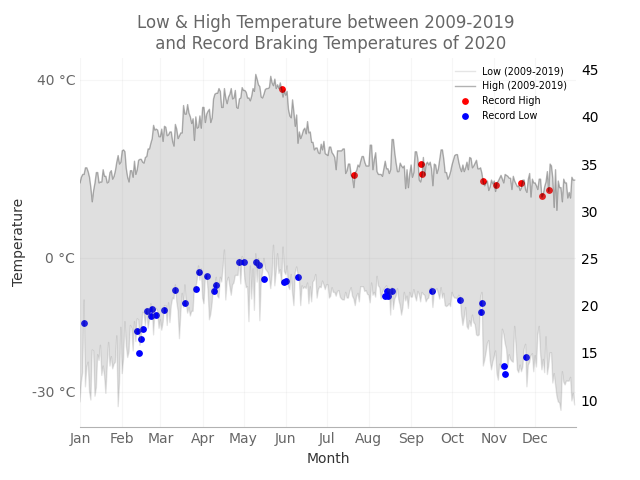

In [260]:
# create a new image

%matplotlib notebook

plt.figure()  
  
ax1 = plt.gca() # Primary axes
ax2 = ax1.twinx() # Seondary Axis

plt.scatter(record_high.index,record_high['TMAX'], color = 'r', s = 15)
plt.scatter(record_low.index,record_low['TMIN'], color = 'b', s = 15)

ax2.plot(grouped_min['TMIN'], '-',color ='k', alpha = 0.1,  linewidth=1)
ax2.plot(grouped_max['TMAX'],'-', color ='k', alpha = 0.3,  linewidth=1)
ax2.fill_between(grouped_min.index, 
                       grouped_min['TMIN'], grouped_max['TMAX'], 
                       facecolor='gray', 
                       alpha=0.25)
ax2.set_xlim(1,365)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_labels, alpha = 0.6)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
ax2.set_title('Low & High Temperature between 2009-2019 \n and Record Braking Temperatures of 2020', alpha =0.6)

# Set y tick Labels
axlim = ax1.set_ylim(-380,450)
yticks = pd.Series([-300,0,400])
ax1.set_yticks(yticks)
# yticks = (ax.get_yticks() / 10).astype(int)
ylabels = pd.Series(yticks/10).astype(int).astype(str) + ' °C'
ax1.set_yticklabels(ylabels, alpha = 0.6)

# Secondary y-axis labels
#Convert to fahrenheit from celcius
#ax2.set_ylim(axlim)
#ax2.set_yticks(yticks)
#yticks_ax2 = (yticks/10 *  (9/5) + 32).astype(int)
#ylabels_ax2 = pd.Series(yticks_ax2).astype(int).astype(str) + ' °F'
#ax2.set_yticklabels(ylabels_ax2, alpha = 0.6)

# Shaded Gray background
# start = pd.Series(xticks).iloc[::2]
# end = pd.Series(xticks).iloc[1::2]
# for s, e in zip(start, end):
#     ax1.axvspan(s,e, alpha=0.02, color='k', linewidth = 0)

ax1.grid(True, alpha = 0.1)


# invisible Frame
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)

# Removing Ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

# Labels
ax1.set_xlabel('Month', alpha = 0.8)
ax1.set_ylabel('Temperature' , alpha = 0.8)

# legend
leg = ax2.legend(labels = ['Low (2009-2019)','High (2009-2019)','Record High','Record Low'], frameon = False, fontsize = 'x-small')
plt.show()
plt.savefig('visual2.pdf')

In [261]:
import scipy as spy
from scipy import optimize

In [262]:
M=100
N=15
A=np.ones([M,N])

<IPython.core.display.Javascript object>


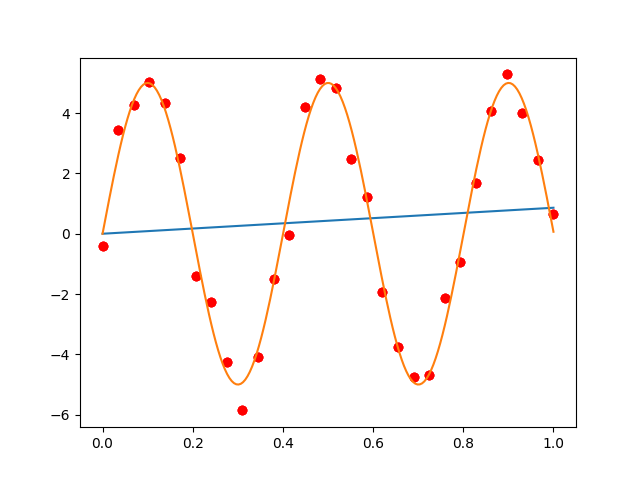

[7.71985245e+01 3.55508858e-03]
[5.00436909 4.99583294]


In [263]:
%matplotlib notebook

def f(x, a, b):
    return a*np.sin(b*np.pi*x)

p = [5, 5]
x = np.linspace(0, 1, 30)
y = f(x, *p) + .5*np.random.normal(size=len(x))
xn = np.linspace(0, 1, 200)

plt.plot(x, y, 'or')
plt.show()
popt, pcov = optimize.curve_fit(f, x, y)

print (popt)

plt.plot(x, y, 'or')
plt.plot(xn, f(xn, *popt))
plt.show()

p0 = [3, 4]
popt, pcov = optimize.curve_fit(f, x, y, p0=p0)
print (popt)

plt.plot(x, y, 'or')
plt.plot(xn, f(xn, *popt))

plt.show()


[[0.88234981 0.71954882]
 [0.30439751 0.96458242]
 [0.50587648 0.01586499]
 [0.48329329 0.88159276]
 [0.22913759 0.21080721]
 [0.3424125  0.37351451]
 [0.8843639  0.47930988]
 [0.31816352 0.29281824]
 [0.79555258 0.80117265]
 [0.31833184 0.73761902]]
[[0.41353338]
 [0.26491483]]


<IPython.core.display.Javascript object>


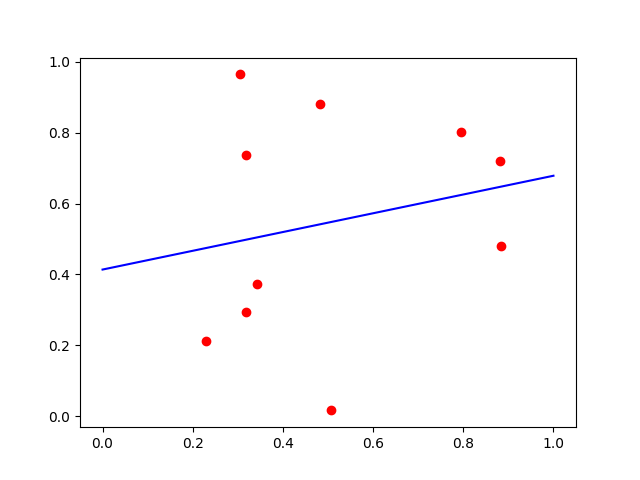

In [264]:
%matplotlib notebook
# Random data
N = 10
M = 2
input = np.random.random((N,M))
print(input) 

# Setup matrices
m = np.shape(input)[0]
X = np.matrix([np.ones(m), input[:,0]]).T
y = np.matrix(input[:,1]).T

# Solve for projection matrix
p_mat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print (p_mat)

# Find regression line
xx = np.linspace(0, 1, 2)
yy = np.array(p_mat[0] + p_mat[1] * xx)

# Plot data, regression line
plt.figure(1)
plt.plot(xx, yy.T, color='b')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()


In [265]:
M=365
N=15
A=np.ones([M,N])
x=list(range(0,365))
x[0]


0

In [266]:
N = 7
A=np.vander(x, N)
A


array([[               0,                0,                0, ...,
                       0,                0,                1],
       [               1,                1,                1, ...,
                       1,                1,                1],
       [              64,               32,               16, ...,
                       4,                2,                1],
       ...,
       [2250357012933184,    6216455836832,      17172529936, ...,
                  131044,              362,                1],
       [2287914286629609,    6302794178043,      17363069361, ...,
                  131769,              363,                1],
       [2325992456359936,    6390089165824,      17555190016, ...,
                  132496,              364,                1]])

In [267]:
df


,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-01,23.0,29.9,23.0
1,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-02,22.4,22.4,22.4
2,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-03,23.4,28.6,15.7
3,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-04,22.5,29.4,22.5
4,IN001080500,"BEGUMPET OBSERVATORY, IN",2009-01-05,23.0,30.0,23.0
...,...,...,...,...,...,...
4353,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-12-23,20.7,29.4,20.7
4354,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-12-24,21.7,28.6,14.2
4355,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-12-25,20.3,28.2,20.3
4356,IN001080500,"BEGUMPET OBSERVATORY, IN",2020-12-26,20.4,20.4,20.4


<IPython.core.display.Javascript object>


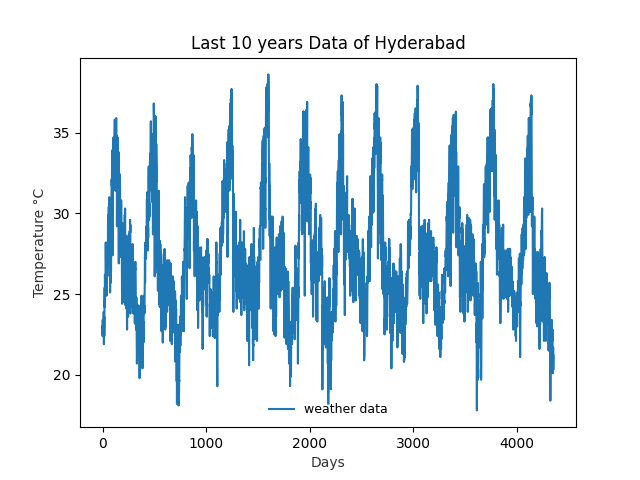

Text(0.5, 1.0, 'Last 10 years Data of Hyderabad')

In [268]:
%matplotlib notebook
plt.plot(df['TAVG'],label='weather data')
plt.legend(loc=8,fontsize=9, frameon=False)
ax1 = plt.gca()
ax1.set_xlabel('Days', alpha = 0.8)
ax1.set_ylabel('Temperature °C' , alpha = 0.8)
ax1.set_title('Last 10 years Data of Hyderabad')


In [269]:
plt.savefig('JUSTHYDDATA.pdf')

In [270]:
b=grouped_max["TMAX"].tolist()

In [271]:
b
b[-1]
len(b)

365

In [272]:
b[1]
np.linalg.lstsq(A, b)

<ipython-input-272-f922b211fea7>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, b)


(array([ 9.15564179e-13, -1.12426560e-09,  5.24211843e-07, -1.13152705e-04,
         1.06509799e-02, -2.87843690e-01,  3.52754706e+01]),
 array([571.69770698]),
 7,
 array([1.24180550e+16, 3.08630874e+12, 2.04239165e+09, 2.91220276e+06,
        9.00521195e+03, 7.18642238e+01, 2.81338852e+00]))

In [273]:
from numpy.linalg import svd
from numpy.linalg import inv
from scipy.linalg import block_diag


In [274]:
U,sigma,Vt=np.linalg.svd(A,full_matrices=False)
Utb=np.matmul(U.transpose(),b)
omega=Utb/sigma
least_sq_svd=np.dot(inv(Vt),omega)
np.linalg.norm(np.dot(A,least_sq_svd)-b,2)
least_sq_svd

array([ 9.15564179e-13, -1.12426560e-09,  5.24211843e-07, -1.13152705e-04,
        1.06509799e-02, -2.87843690e-01,  3.52754706e+01])

In [275]:
least_sq_normal,res,rankss,s=np.linalg.lstsq(np.matmul(A.transpose(),A),np.dot(A.transpose(),b),rcond=None)


In [276]:
s

array([1.60399419e+19, 1.25751116e+19, 8.18041243e+18, 1.47254273e+18,
       1.43401032e+18, 1.63245851e+16, 5.11044834e+09])

In [277]:
np.linalg.norm(np.dot(A,least_sq_normal)-b,2)

136.00634154247984

In [278]:
least_sq_normal

array([5.57878960e-15, 5.44370105e-13, 7.82553094e-11, 1.25578135e-08,
       2.31573000e-06, 4.83036811e-04, 3.33296069e+01])

In [279]:
U,sigma,Vt=np.linalg.svd(A,full_matrices=False)
Utb=np.matmul(U.transpose(),b)
omega=Utb/sigma
least_sq_svd=np.dot(inv(Vt),omega)
np.linalg.norm(np.dot(A,least_sq_svd)-b,2)

23.91020089789426

In [280]:
seq=np.linspace(0,1,365)
x,residuals,rank,s=np.linalg.lstsq(A,b,rcond=None)

In [281]:
s


array([1.24180550e+16, 3.08630874e+12, 2.04239165e+09, 2.91220276e+06,
       9.00521195e+03, 7.18642238e+01, 2.81338852e+00])

In [282]:
seq

array([0.        , 0.00274725, 0.00549451, 0.00824176, 0.01098901,
       0.01373626, 0.01648352, 0.01923077, 0.02197802, 0.02472527,
       0.02747253, 0.03021978, 0.03296703, 0.03571429, 0.03846154,
       0.04120879, 0.04395604, 0.0467033 , 0.04945055, 0.0521978 ,
       0.05494505, 0.05769231, 0.06043956, 0.06318681, 0.06593407,
       0.06868132, 0.07142857, 0.07417582, 0.07692308, 0.07967033,
       0.08241758, 0.08516484, 0.08791209, 0.09065934, 0.09340659,
       0.09615385, 0.0989011 , 0.10164835, 0.1043956 , 0.10714286,
       0.10989011, 0.11263736, 0.11538462, 0.11813187, 0.12087912,
       0.12362637, 0.12637363, 0.12912088, 0.13186813, 0.13461538,
       0.13736264, 0.14010989, 0.14285714, 0.1456044 , 0.14835165,
       0.1510989 , 0.15384615, 0.15659341, 0.15934066, 0.16208791,
       0.16483516, 0.16758242, 0.17032967, 0.17307692, 0.17582418,
       0.17857143, 0.18131868, 0.18406593, 0.18681319, 0.18956044,
       0.19230769, 0.19505495, 0.1978022 , 0.20054945, 0.20329

<IPython.core.display.Javascript object>


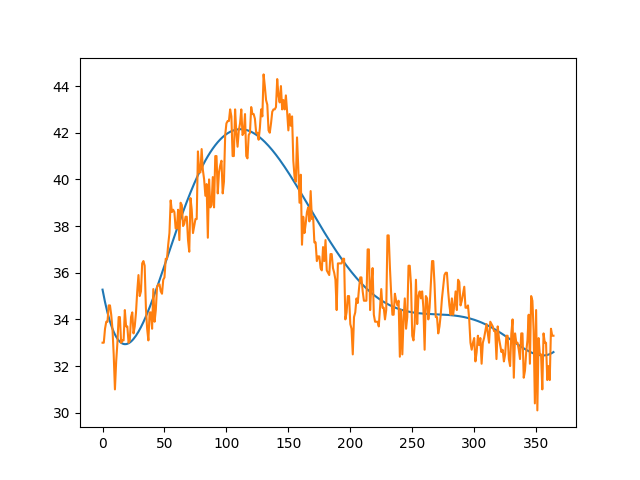

In [283]:
%matplotlib notebook
#plt.plot(df['TAVG'])
plt.plot(np.dot(A,least_sq_svd))
plt.plot(grouped_max["TMAX"])
#plt.plot(seq,np.dot(A,x)-b)

In [284]:
b=grouped_min["TMIN"].tolist()

In [285]:
b

[14.9,
 9.8,
 11.9,
 12.9,
 20.6,
 11.4,
 13.5,
 14.0,
 10.9,
 10.0,
 15.3,
 15.2,
 10.4,
 11.3,
 14.8,
 14.2,
 15.8,
 12.6,
 13.6,
 12.6,
 10.7,
 13.6,
 16.1,
 13.6,
 14.6,
 13.3,
 13.8,
 14.0,
 16.8,
 9.3,
 11.8,
 17.7,
 12.8,
 14.4,
 18.3,
 15.7,
 14.5,
 15.1,
 17.9,
 17.6,
 15.2,
 18.3,
 16.2,
 18.6,
 18.5,
 15.8,
 16.7,
 19.3,
 19.2,
 17.9,
 19.7,
 17.6,
 18.5,
 20.2,
 19.8,
 16.9,
 19.5,
 19.7,
 19.4,
 17.6,
 18.5,
 17.4,
 18.2,
 20.0,
 20.0,
 17.9,
 20.3,
 18.2,
 20.0,
 20.8,
 20.7,
 22.2,
 20.4,
 19.4,
 16.5,
 19.2,
 21.3,
 19.8,
 22.2,
 20.2,
 19.2,
 19.8,
 18.9,
 19.4,
 19.4,
 22.0,
 21.9,
 22.7,
 24.2,
 22.7,
 23.9,
 20.8,
 20.2,
 23.0,
 23.3,
 21.6,
 18.5,
 19.1,
 20.3,
 22.2,
 22.0,
 23.0,
 21.0,
 20.8,
 23.0,
 22.5,
 24.0,
 25.9,
 20.6,
 22.6,
 23.0,
 22.0,
 21.1,
 22.2,
 22.4,
 23.2,
 23.2,
 23.2,
 24.9,
 22.3,
 25.2,
 24.9,
 22.8,
 21.9,
 22.0,
 18.3,
 24.2,
 20.7,
 23.9,
 19.5,
 25.5,
 22.5,
 25.0,
 18.4,
 22.5,
 23.6,
 25.0,
 23.9,
 23.7,
 23.5,
 23.0,
 21.8,
 23.2,
 

<IPython.core.display.Javascript object>


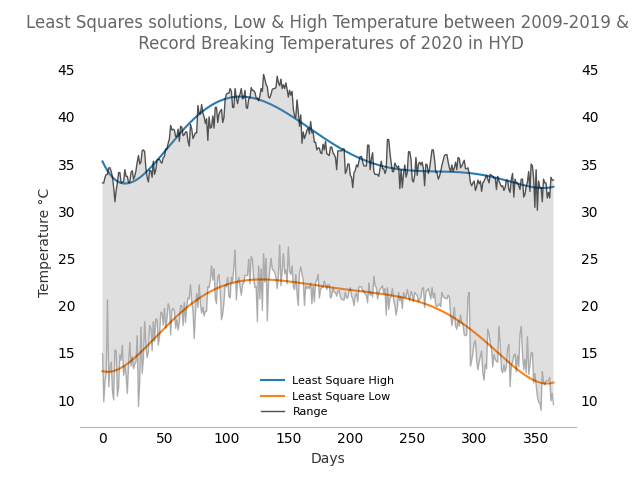

In [286]:
%matplotlib notebook
#plt.plot(df['TAVG'])
#plt.plot(np.dot(A,least_sq_svd))
plt.plot(np.dot(A,least_sq_svd),alpha =8.0,label="Least Square High")
#plt.plot(grouped_max["TMAX"])
#plt.plot(grouped_min["TMIN"])

In [287]:
U,sigma,Vt=np.linalg.svd(A,full_matrices=False)
Utb=np.matmul(U.transpose(),b)
omega=Utb/sigma
least_sq_svd=np.dot(inv(Vt),omega)
np.linalg.norm(np.dot(A,least_sq_svd)-b,2)
least_sq_svd

array([ 6.83605960e-13, -7.57538165e-10,  3.16399458e-07, -6.10096553e-05,
        4.91237280e-03, -3.69375890e-02,  1.30551161e+01])

In [288]:
plt.plot(np.dot(A,least_sq_svd),alpha =8.0,label="Least Square Low")
plt.plot(grouped_max["TMAX"], '-',color ='k', alpha = 0.7,  linewidth=1, label='Range')
plt.legend(loc=8,fontsize=8, frameon=False)
plt.plot(grouped_min["TMIN"], '-',color ='k', alpha = 0.3,  linewidth=1, label='LOW')

#plt.scatter(record_high.index,record_high['TMAX'], color = 'r', s = 15, label='NEW HIGH')
#plt.scatter(record_low.index,record_low['TMIN'], color = 'b', s = 15,label='NEW LOW')


In [289]:
#getiing the axis
ax1 = plt.gca() # Primary axes
ax2 = ax1.twinx() 

In [290]:
ax2.set_title('Least Squares solutions, Low & High Temperature between 2009-2019 &\n Record Breaking Temperatures of 2020 in HYD', alpha =0.6)

Text(0.5, 1.0, 'Least Squares solutions, Low & High Temperature between 2009-2019 &\n Record Breaking Temperatures of 2020 in HYD')

In [291]:
# invisible Frame
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)

In [292]:
ax1.set_xlabel('Days', alpha = 0.8)
ax1.set_ylabel('Temperature °C' , alpha = 0.8)

Text(47.097222222222214, 0.5, 'Temperature °C')

In [293]:
leg = ax2.legend(labels = ['Upper Bound','Lower Bound'], frameon = False, fontsize = 'x-small')
plt.show()

In [294]:
# Removing Ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

In [295]:
#plt.savefig('visual_just_least.pdf')

In [296]:
#plt.plot(grouped_max["TMAX"], alpha =0.25)
#plt.plot(grouped_min["TMIN"], alpha =0.25)

In [297]:
ax2.fill_between(grouped_min.index, 
                       grouped_min['TMIN'], grouped_max['TMAX'], 
                       facecolor='gray', 
                       alpha=0.25)

In [298]:
plt.savefig('Final_least.png')

<IPython.core.display.Javascript object>


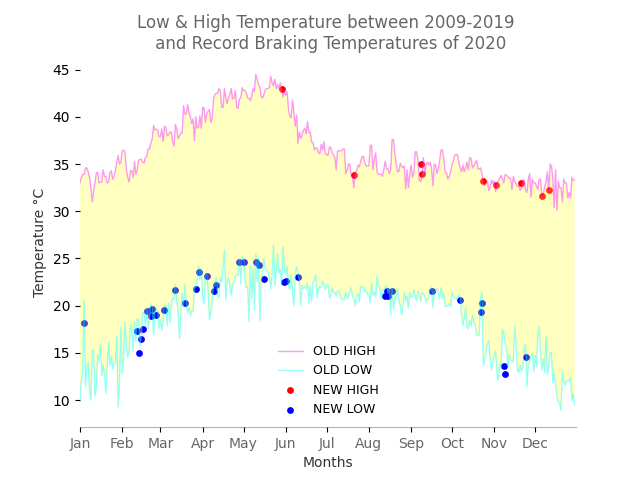

Text(0, 0.5, 'Temperature °C')

In [103]:
%matplotlib notebook
#plt.plot(TMAX_Least_Squares,alpha =8.0,label='Least Square high')
#plt.plot(TMIN_Least_Squares,alpha =8.0,label='Least Square high')
plt.plot(grouped_max["TMAX"], '-',color ='magenta', alpha = 0.4,  linewidth=1,label='OLD HIGH')
plt.plot(grouped_min["TMIN"], '-',color ='cyan', alpha = 0.4,  linewidth=1,label='OLD LOW')
plt.scatter(record_high.index,record_high['TMAX'], color = 'r', s = 15, label ='NEW HIGH')
plt.scatter(record_low.index,record_low['TMIN'], color = 'b', s = 15,label ='NEW LOW')
plt.legend(loc=8,fontsize=9, frameon=False)
#getiing the axis
ax1 = plt.gca() # Primary axes
#ax2 = ax1.twinx()
ax1.set_title('Low & High Temperature between 2009-2019 \n and Record Braking Temperatures of 2020', alpha =0.6)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)
ax1.set_xlim(1,365)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
#ax1.set_xticklabels(xticks_labels, alpha = 0.6)
ax1.fill_between(grouped_min.index, 
                       grouped_min['TMIN'], grouped_max['TMAX'], 
                       facecolor='yellow', 
                       alpha=0.25)
ax1.set_xlabel('Months', alpha = 0.8)
ax1.set_ylabel('Temperature °C' , alpha = 0.8)

In [104]:
plt.savefig('HYD_Just_temp.png')